In [83]:
import networkx as nx
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt

In [84]:
def generate_pairs(N):
    pairs = []
    for i in range(N):
        for j in range(i + 1,N):
            pair = (i,j)
            pairs.append(pair)
    return pairs

In [85]:
def random_graph(N,p):

    G = nx.Graph()
    G.add_nodes_from(np.arange(N))
    pairs = generate_pairs(N)
    for pair in pairs:
        if np.random.uniform(0,1) < p:
            G.add_edge(pair[0],pair[1])
    return G

In [86]:
def watts_strogatz(N,K,p):
    
    G = nx.Graph()
    nodes = np.arange(1,N + 1)
    neigbors_index = np.arange(1,K//2 + 1)
    G.add_nodes_from(nodes)
    
    for i in range(len(nodes)):
        for ind in neigbors_index:
            G.add_edge(nodes[i],nodes[i - ind])
            if np.random.uniform(0,1) < p:
                k = np.random.choice(nodes)
                if k != i + 1:
                    G.add_edge(nodes[i],k)
                    G.remove_edge(nodes[i],nodes[i - ind])
    return G

In [87]:
def probabilities(k):
    
    n = len(k)
    p = np.zeros(n)
    
    for i in range(len(k)):
        p[i] = k[i]/(np.sum(k) - np.sum(np.arange(len(k))))
    
    return p

    
def barabasi_albert(m,m0):
    
    if m0 > m:
        raise ValueError('m does not satisfy m0 <= m')
    
    G = nx.Graph()
    G.add_edges_from(generate_pairs(m0 + 1))
    p = probabilities(G.degree)
    new_node = m0 + 1
    while len(G.nodes) < m:
        con_edges = np.random.choice(list(G.nodes),m0, p = list(p),replace = False)
        for edge in con_edges:
            if (edge,new_node) not in G.edges:
                G.add_edge(new_node,edge)
        p = probabilities(G.degree)
        new_node += 1
    return G

### Visualization of each models for N = 15 nodes

In [88]:
N = 15
m0 = 2
K = 4
p = 0.4
g1 = random_graph(N,p)
g2 = watts_strogatz(N,K,p)
g3 = barabasi_albert(N,m0)

Random graph visualization

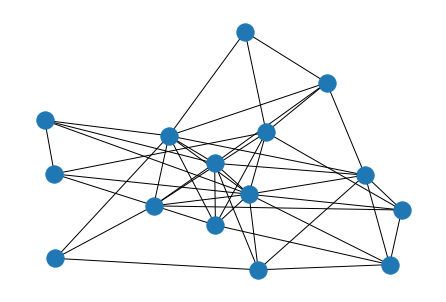

In [89]:
nx.draw(g1)

Watts - Strogatz model visualization for K = 4 , p = 0.4

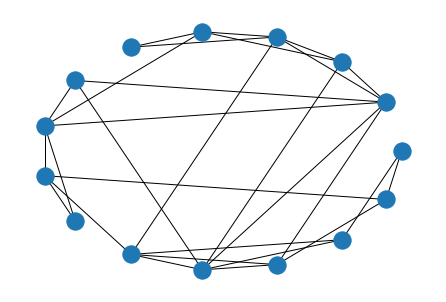

In [90]:
nx.draw_circular(g2)

Barabasi - Albert model visualization for N = 15 and m0 = 2

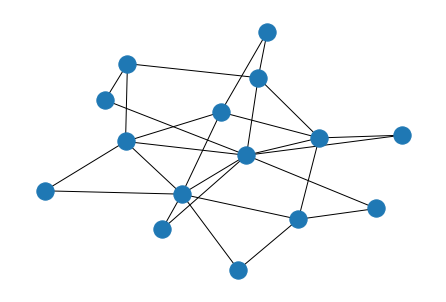

In [91]:
nx.draw(g3)

### Results for random graph for number of nodes N = 100

In [92]:
N = 100
probs = np.arange(0.1,1,0.1)
random_graphs = []
for p in probs:
    g = random_graph(N,p)
    random_graphs.append(g)

### The number of nodes and edges, average degree and variance of the degree distribution for every probability of connection between nodes are written into a data frame below

In [93]:
number_of_edges = []
number_of_nodes = []
average_degree = []
variance_of_the_degrees = []
for graph in random_graphs:
    degree_seq = dict(nx.degree(graph)).values()
    number_of_nodes.append(len(graph.nodes))
    number_of_edges.append(len(graph.edges))
    average_degree.append(st.mean(degree_seq))
    variance_of_the_degrees.append(st.variance(degree_seq))
result_df = pd.DataFrame(data = {'Number of nodes' : number_of_nodes, 'Number of edges' : number_of_edges, 
                                'Average degree' : average_degree, 'Variance of the degrees' : variance_of_the_degrees})
result_df.index = probs
result_df

,Number of nodes,Number of edges,Average degree,Variance of the degrees
0.1,100,515,10.30,9.727273
0.2,100,984,19.68,15.674343
0.3,100,1485,29.70,23.909091
0.4,100,1936,38.72,27.355152
0.5,100,2427,48.54,24.513535
0.6,100,2905,58.10,20.292929
0.7,100,3475,69.50,27.303030
0.8,100,3983,79.66,18.327677
0.9,100,4460,89.20,10.060606


### Frequency plots for the degree of the nodes and for every probability of connection between the nodes are shown below

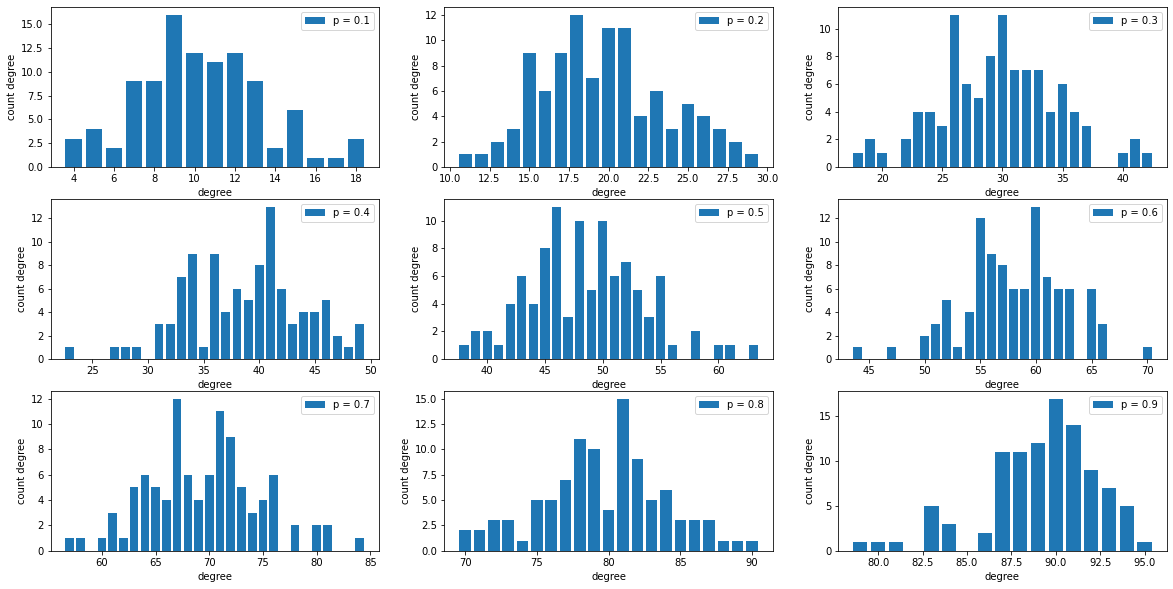

In [94]:
plt.figure(figsize=(20,10))
for m,graph,p in zip(np.arange(len(probs)),random_graphs,probs):
    degrees = list(graph.degree)
    degrees_seq = []
    for deg in degrees:
        degrees_seq.append(deg[1])
    unique,counts = np.unique(degrees_seq,return_counts = True)
    
    plt.subplot(3,3,m + 1)
    plt.bar(unique,counts , label = 'p = {}' . format(p.round(2)))
    
    plt.xlabel('degree')
    plt.ylabel('count degree')
    plt.legend()    
plt.show()

### Fitted model distribution to the obtained data

In [95]:
def binomial_dist(kvals,N,p):
    from scipy.special import binom
    pk = np.zeros(N)
    for k in kvals:
        pk[k - 1] = binom(N - 1,k)* (p**k) * (1-p)**(N - 1- k)
    return pk

def degree_dist(degree_seq):
    degree_seq.sort()
    degree_seq = degree_seq / len(degree_seq)
    return degree_seq

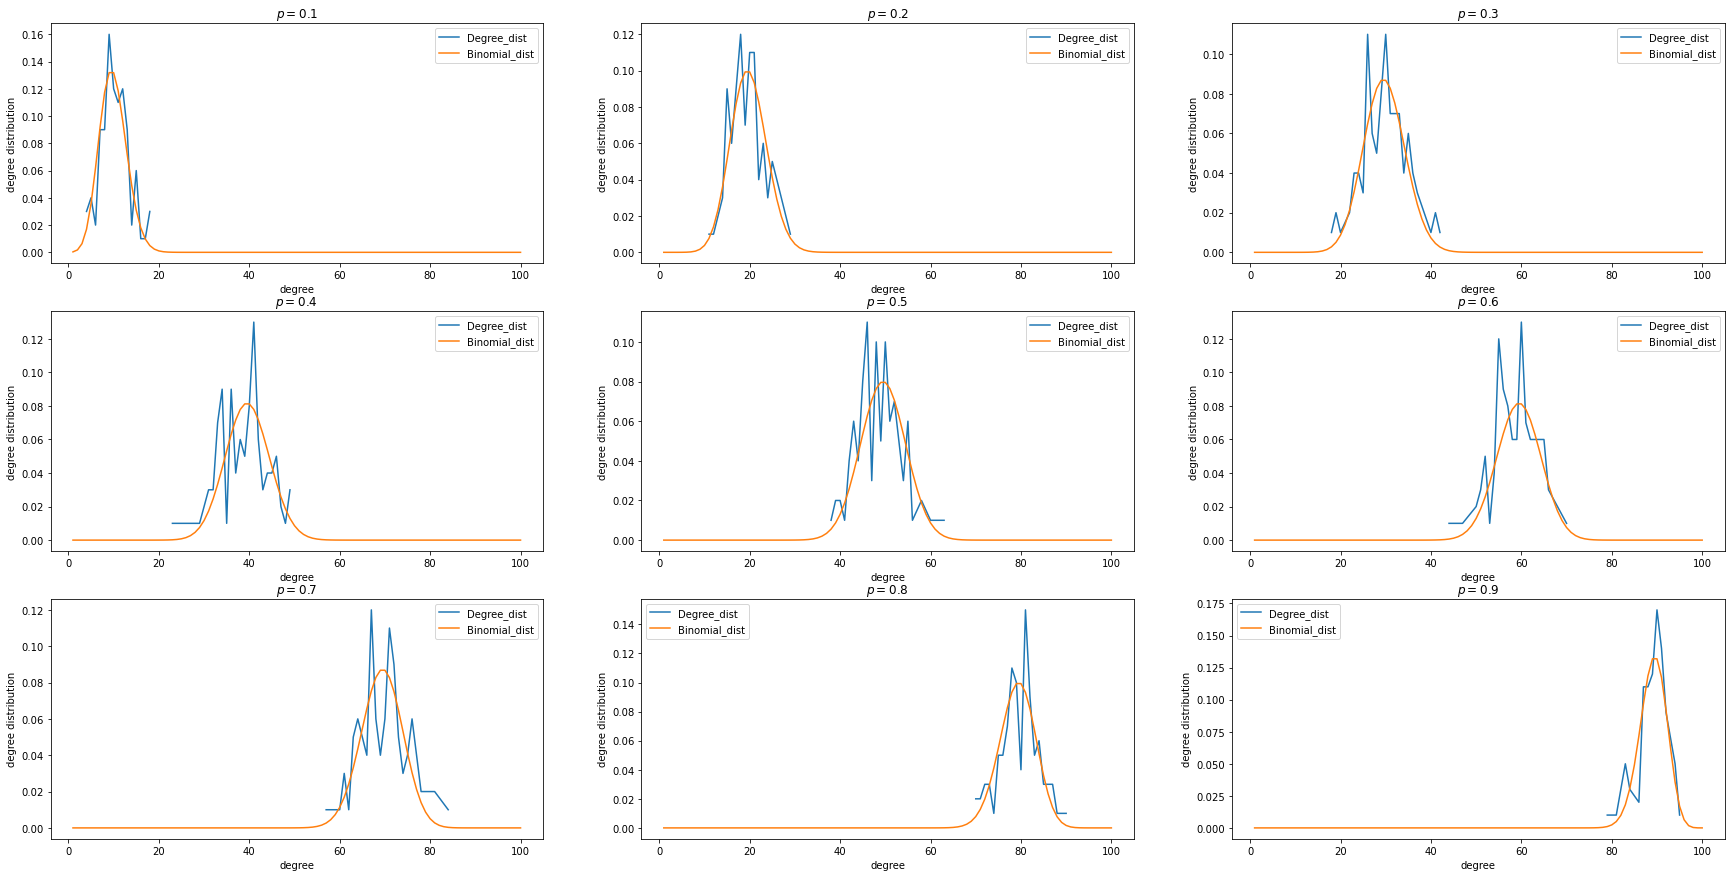

In [101]:
plt.figure(figsize=(30,15))
for m,graph,p in zip(np.arange(len(probs)),random_graphs,probs):
    kvals = np.arange(1,N +1)
    pk = binomial_dist(kvals,N,p)
    degrees = list(graph.degree)
    degrees_seq = np.zeros(N)
    for k,deg in enumerate(degrees):
        degrees_seq[k] = deg[1]
    unique,counts = np.unique(degrees_seq,return_counts = True)
    
    plt.subplot(3,3,m + 1)
    plt.plot(unique,counts/N , label = 'Degree_dist')
    plt.plot(kvals,pk,label = 'Binomial_dist')
    plt.title('$p = {}$'.format(p.round(2)))
    plt.xlabel('degree')
    plt.ylabel('degree distribution')
    plt.legend()    
plt.show()

### Results for Watts - Strogatz model 

In [107]:
N = 100
K = [2,4,6]
probs = np.arange(0.2,1.1,0.4)
ws_graphs = []
for k,p in zip(K,probs):
    g = watts_strogatz(N,k,p)
    ws_graphs.append(g)

### The number of nodes and edges, average degree and variance of the degree distribution

In [108]:
number_of_edges = []
number_of_nodes = []
average_degree = []
variance_of_the_degrees = []
for graph in ws_graphs:
    degree_seq = dict(nx.degree(graph)).values()
    number_of_nodes.append(len(graph.nodes))
    number_of_edges.append(len(graph.edges))
    average_degree.append(st.mean(degree_seq))
    variance_of_the_degrees.append(st.variance(degree_seq))
result_df = pd.DataFrame(data = {'Number of nodes' : number_of_nodes, 'Number of edges' : number_of_edges, 
                                'Average degree' : average_degree, 'Variance of the degrees' : variance_of_the_degrees})
result_df.index = probs
result_df

,Number of nodes,Number of edges,Average degree,Variance of the degrees
0.2,100,100,2.0,0.444444
0.6,100,195,3.9,1.727273
1.0,100,275,5.5,2.979798


### Frequency plots for the degree of the nodes 

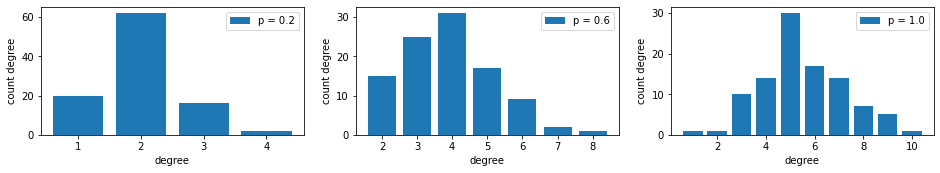

In [113]:
plt.figure(figsize=(16,8))
for m,graph,p in zip(np.arange(len(probs)),ws_graphs,probs):
    degrees = list(graph.degree)
    degrees_seq = []
    for deg in degrees:
        degrees_seq.append(deg[1])
    unique,counts = np.unique(degrees_seq,return_counts = True)
    
    plt.subplot(3,3,m + 1)
    plt.bar(unique,counts , label = 'p = {}' . format(p.round(2)))
    
    plt.xlabel('degree')
    plt.ylabel('count degree')
    plt.legend()    
plt.show()

### Degree distribution

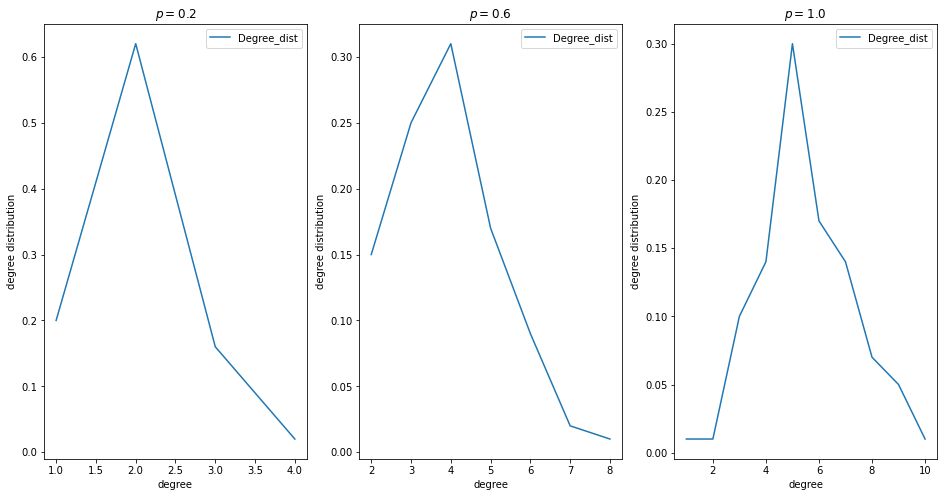

In [114]:
plt.figure(figsize=(16,8))
for m,graph,p in zip(np.arange(len(probs)),ws_graphs,probs):
    degrees = list(graph.degree)
    degrees_seq = np.zeros(N)
    for k,deg in enumerate(degrees):
        degrees_seq[k] = deg[1]
    unique,counts = np.unique(degrees_seq,return_counts = True)
    
    plt.subplot(1,3,m + 1)
    plt.plot(unique,counts/N , label = 'Degree_dist')
    plt.title('$p = {}$'.format(p.round(2)))
    plt.xlabel('degree')
    plt.ylabel('degree distribution')
    plt.legend()    
plt.show()

### Results to the Barabasi - Albert model 

In [115]:
m = 100
M0 = [2,3,4]
ba_graphs = []
for m0 in M0:
    g = barabasi_albert(m,m0)
    ba_graphs.append(g)

### The number of nodes and edges, average degree and variance of the degree distribution

In [117]:
number_of_edges = []
number_of_nodes = []
average_degree = []
variance_of_the_degrees = []
for graph in ba_graphs:
    degree_seq = dict(nx.degree(graph)).values()
    number_of_nodes.append(len(graph.nodes))
    number_of_edges.append(len(graph.edges))
    average_degree.append(st.mean(degree_seq))
    variance_of_the_degrees.append(st.variance(degree_seq))
result_df = pd.DataFrame(data = {'Number of nodes' : number_of_nodes, 'Number of edges' : number_of_edges, 
                                'Average degree' : average_degree, 'Variance of the degrees' : variance_of_the_degrees})
result_df.index = M0
result_df

,Number of nodes,Number of edges,Average degree,Variance of the degrees
2,100,197,3.94,14.723636
3,100,294,5.88,24.975354
4,100,390,7.80,30.888889


### Frequency plots for the degree of the nodes 

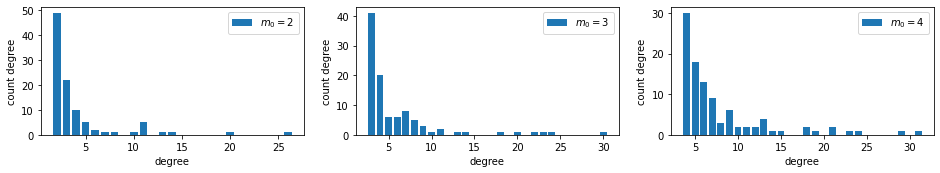

In [122]:
plt.figure(figsize=(16,8))
for m,graph,m0 in zip(np.arange(len(probs)),ba_graphs,M0):
    degrees = list(graph.degree)
    degrees_seq = []
    for deg in degrees:
        degrees_seq.append(deg[1])
    unique,counts = np.unique(degrees_seq,return_counts = True)
    
    plt.subplot(3,3,m + 1)
    plt.bar(unique,counts , label = '$m_0 = {}$' . format(m0))
    
    plt.xlabel('degree')
    plt.ylabel('count degree')
    plt.legend()    
plt.show()

### Degree distribution

In [123]:
def degree_dist_ba(vals,gamma):
    probs = np.zeros(len(vals))
    for i,val in enumerate(vals):
        probs[i] = val ** (-gamma)
    return probs

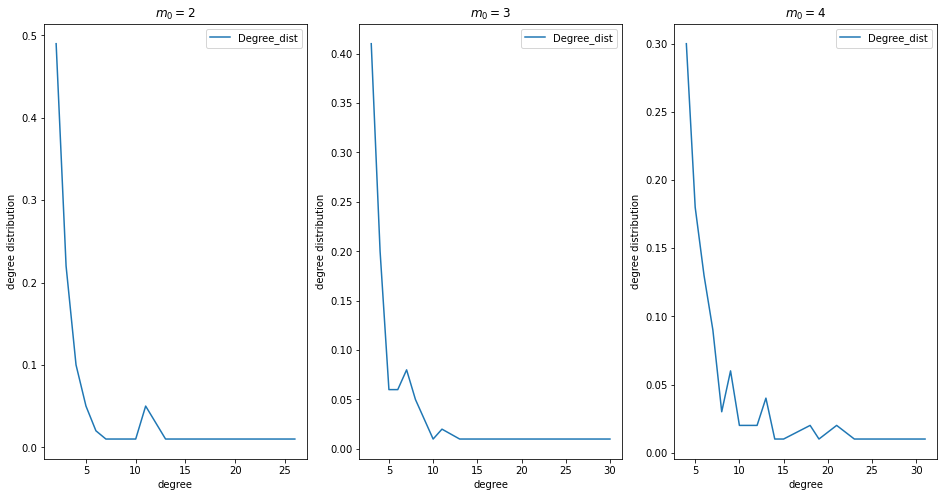

In [124]:
plt.figure(figsize=(16,8))
for m,graph,m0 in zip(np.arange(len(probs)),ba_graphs,M0):
    degrees = list(graph.degree)
    degrees_seq = np.zeros(N)
    for k,deg in enumerate(degrees):
        degrees_seq[k] = deg[1]
    unique,counts = np.unique(degrees_seq,return_counts = True)
    
    plt.subplot(1,3,m + 1)
    plt.plot(unique,counts/N , label = 'Degree_dist')
    plt.title('$m_0 = {}$'.format(m0))
    plt.xlabel('degree')
    plt.ylabel('degree distribution')
    plt.legend()    
plt.show()